In [1]:
#Python version
import sys
print(sys.version)

#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


/home/wilson/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#Importing Dataset

df = pd.read_csv("dataset/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [5]:
df['Outcome'].unique()

array([1, 0])

In [6]:
dss = df[df['Outcome'] == 1]
dff = df[df['Outcome'] == 0]

my_tab = pd.crosstab(index=df['Outcome'], columns="Count")
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0    Count
Outcome       
0          500
1          268


In [7]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


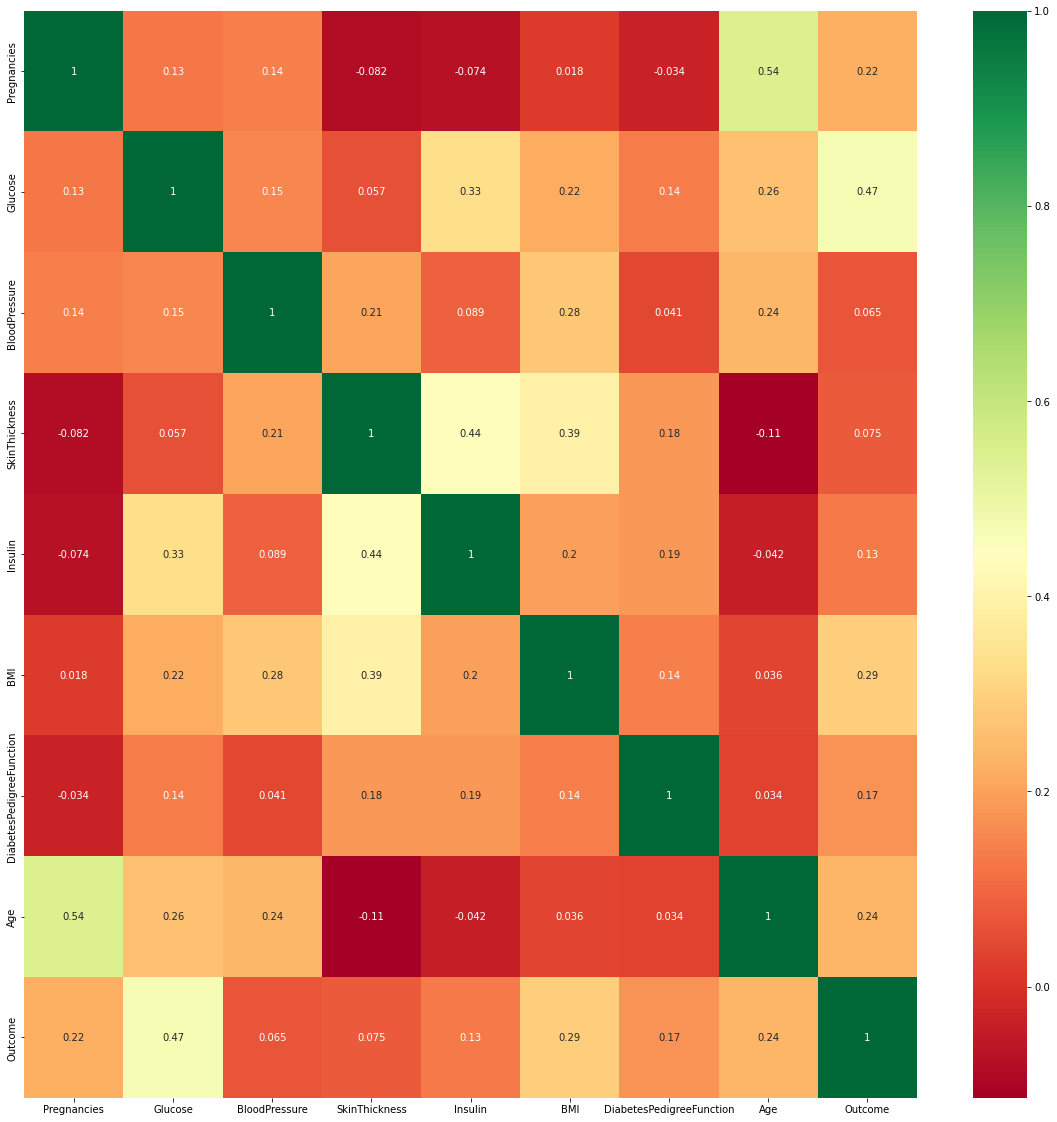

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

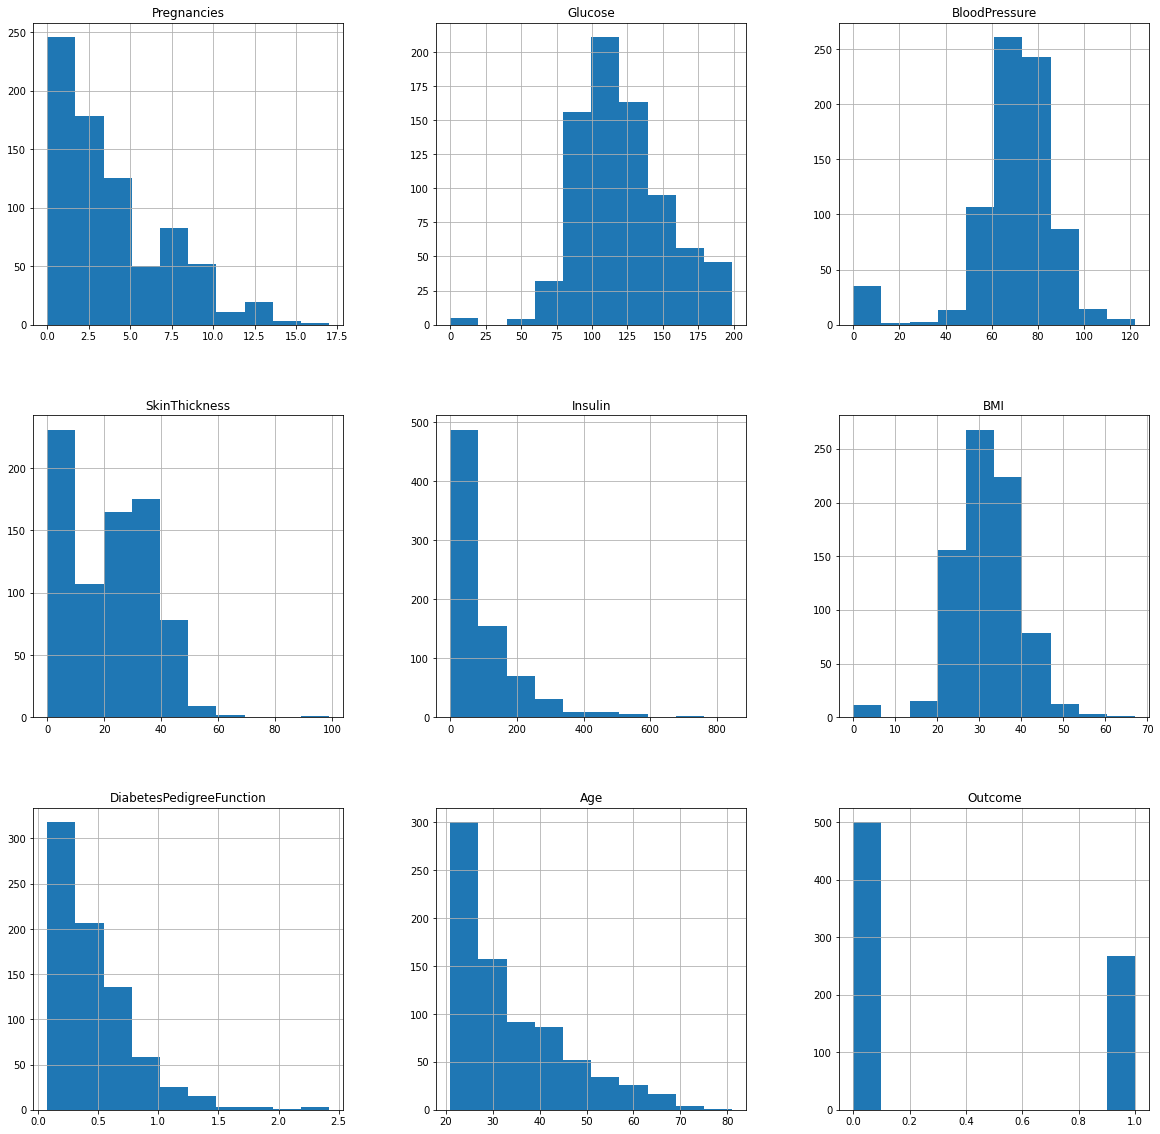

In [11]:
df.hist(figsize=(20,20))

In [12]:
dss = df[df['Outcome'] == 1]
dff = df[df['Outcome'] == 0]

In [13]:
print(dss.shape, dff.shape)

(268, 9) (500, 9)


In [14]:
my_tab = pd.crosstab(index=df['Outcome'], columns="Count")
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0    Count
Outcome       
0          500
1          268


<AxesSubplot:xlabel='col_0'>

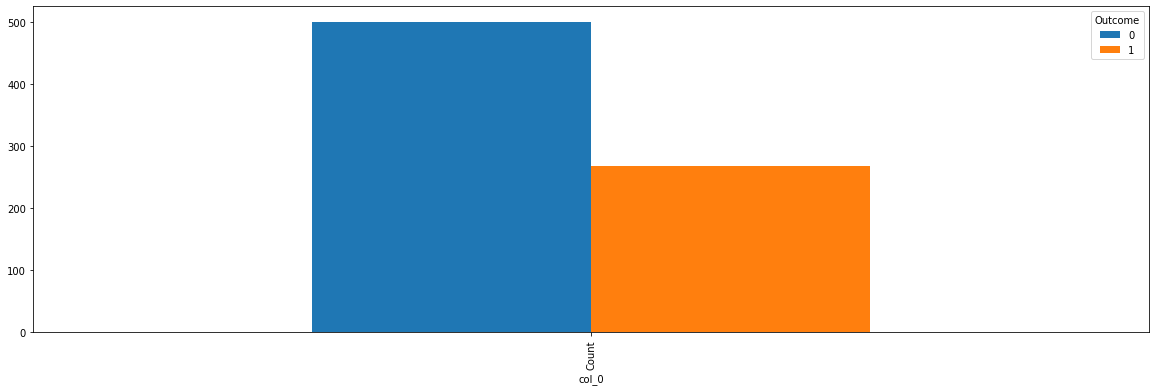

In [15]:
data_counts = pd.DataFrame(my_tab)
pd.DataFrame(data_counts).transpose().plot(kind='bar', figsize=(20,6), stacked=False)

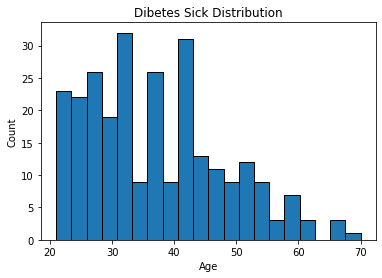

In [17]:
# Histogram Plot of Site EUI

plt.hist(dss['Age'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Age'); 
plt.ylabel('Count'); plt.title('Dibetes Sick Distribution');

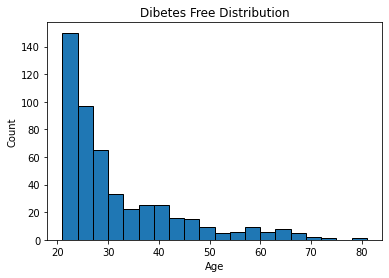

In [18]:
# Histogram Plot of Site EUI

plt.hist(dff['Age'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Age'); 
plt.ylabel('Count'); plt.title('Dibetes Free Distribution');

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [26]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)

In [28]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [29]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({1: 500, 0: 500})


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = shuffle(X, random_state=0)
y = shuffle(y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 800 samples.
Testing set has 200 samples.


In [32]:
#Model Building

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [33]:
seed = 70
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NN', MLPClassifier()))

In [34]:
results = []
names = []

scoring = 'accuracy'

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [36]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:     %f      (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR:     0.753750      (0.097235)
LDA:     0.747500      (0.093842)
KNN:     0.778750      (0.069496)
CART:     0.767500      (0.072930)
NB:     0.730000      (0.094406)
SVM:     0.758750      (0.084511)
RFC:     0.825000      (0.062249)
NN:     0.760000      (0.082310)


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

final_model = RandomForestClassifier()

final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[84 22]
 [13 81]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       106
           1       0.79      0.86      0.82        94

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200

0.8270774789241269


In [38]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), [100]*5],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0004, 0.0005, 0.05],
    'learning_rate': ['constant','adaptive']
}

In [39]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=100, random_state=1)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

clf.fit(X, y)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.0004, 0.0005, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,),
                                                [100, 100, 100, 100, 100]],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [40]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0004, 'hidden_layer_sizes': [100, 100, 100, 100, 100], 'learning_rate': 'constant', 'solver': 'adam'}


In [41]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

In [42]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_true, y_pred))

print('Results on the test set:')
print(classification_report(y_true, y_pred))
print(roc_auc_score(y_test, y_pred))

[[86 20]
 [ 1 93]]
Results on the test set:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       106
           1       0.82      0.99      0.90        94

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.89       200
weighted avg       0.91      0.90      0.89       200

0.9003412284223204


In [43]:
new = df.drop(['Outcome'], axis=1)
newColumns = list(new.columns)

In [44]:
model_columns = newColumns

import joblib

Final_Model = 'saved_model/Final-Model.sav'
joblib.dump(clf, Final_Model)

Model_columns = 'saved_model/Final-Model-Columns.sav'
joblib.dump(model_columns, Model_columns)

['saved_model/Final-Model-Columns.sav']